<a href="https://colab.research.google.com/github/MSR806/DL/blob/master/DL_FeedForwardNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Outline**


1.   Generate data that is not linearly sperable.
2.   Train with SN and see performance
3. Write from scratch our first feed forward network
4. Train the FF network on the data and compare with SN



#Setup

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [51]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b= None

  def perceptron(self, x):
    return np.dot(self.w, x) + self.b

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)

  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))

    if y == 0:
      return y_pred*x
    elif y == 1:
      return -1*(1-y_pred)*x
    else:
      raise ValueError("y should be 0 or 1")

  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))

    if y == 0:
      return y_pred
    elif y == 1:
      return -1*(1-y_pred)
    else:
      raise ValueError("y should be 0 or 1")

  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise=True, loss_fn = 'mse', display_loss=False):
      # initialise w,b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    if display_loss:
        loss = {}

    for i in notebook.tqdm(range(epochs), total = epochs, unit = 'epoch'):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn=='mse':
          dw += self.grad_w_mse(x,y)
          db += self.grad_b_mse(x,y)
        elif loss_fn == 'ce':
          dw += self.grad_w_ce(x,y)
          db += self.grad_b_ce(x,y)
        
      m = X.shape[1]
      self.w -= learning_rate*dw/m
      self.b -= learning_rate*db/m

      if display_loss:
        Y_pred = self.predict(X)
        if loss_fn == 'mse':
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == 'ce':
          loss[i] == log_loss(Y, Y_pred)

    if display_loss:
      b = []
      for i in list(loss.keys()):
        key = loss[i]
        b.append(key)
      plt.plot(b)
      plt.xlabel('Epochs')
      if loss_fn == 'mse':
        plt.ylabel('Mean Squared Error')
      elif loss_fn == 'ce':
        plt.ylabel('Log Loss')
      plt.show()

  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [39]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red','blue','black'])

##Generate Data

In [40]:
data, lables = make_blobs(n_samples = 1000, centers = 4, n_features=2, random_state=0)
print(data.shape, lables.shape)

(1000, 2) (1000,)


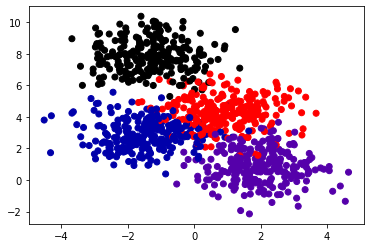

In [41]:
plt.scatter(data[:,0], data[:,1], c=lables, cmap=my_cmap)
plt.show()

In [42]:
labels_orig = lables
lables = np.mod(labels_orig, 2)

In [43]:
lables.shape

(1000,)

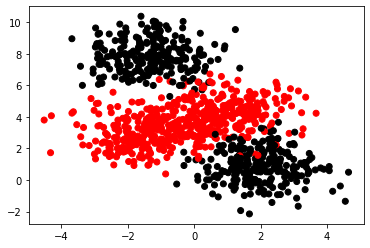

In [44]:
plt.scatter(data[:,0], data[:,1], c=lables, cmap=my_cmap)
plt.show()

In [45]:
X_train, X_val, Y_train, Y_val = train_test_split(data, lables, stratify=lables, random_state = 0)
print(X_train.shape, Y_train.shape)

(750, 2) (750,)


#SN Classification

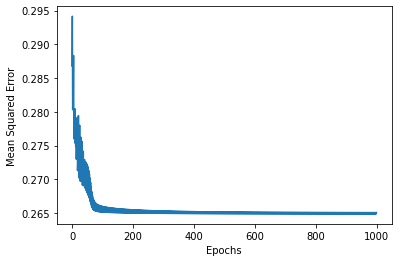

In [53]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs=1000,learning_rate=0.5, display_loss= True)

In [47]:
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype('int').ravel()
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype('int').ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.73
Validation accuracy 0.72


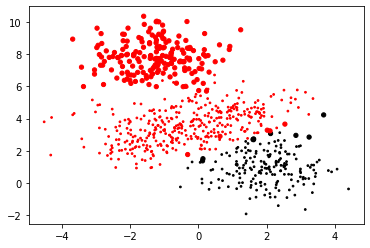

In [49]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train - Y_train)+ 0.2))
plt.show()

#Our First FF Network

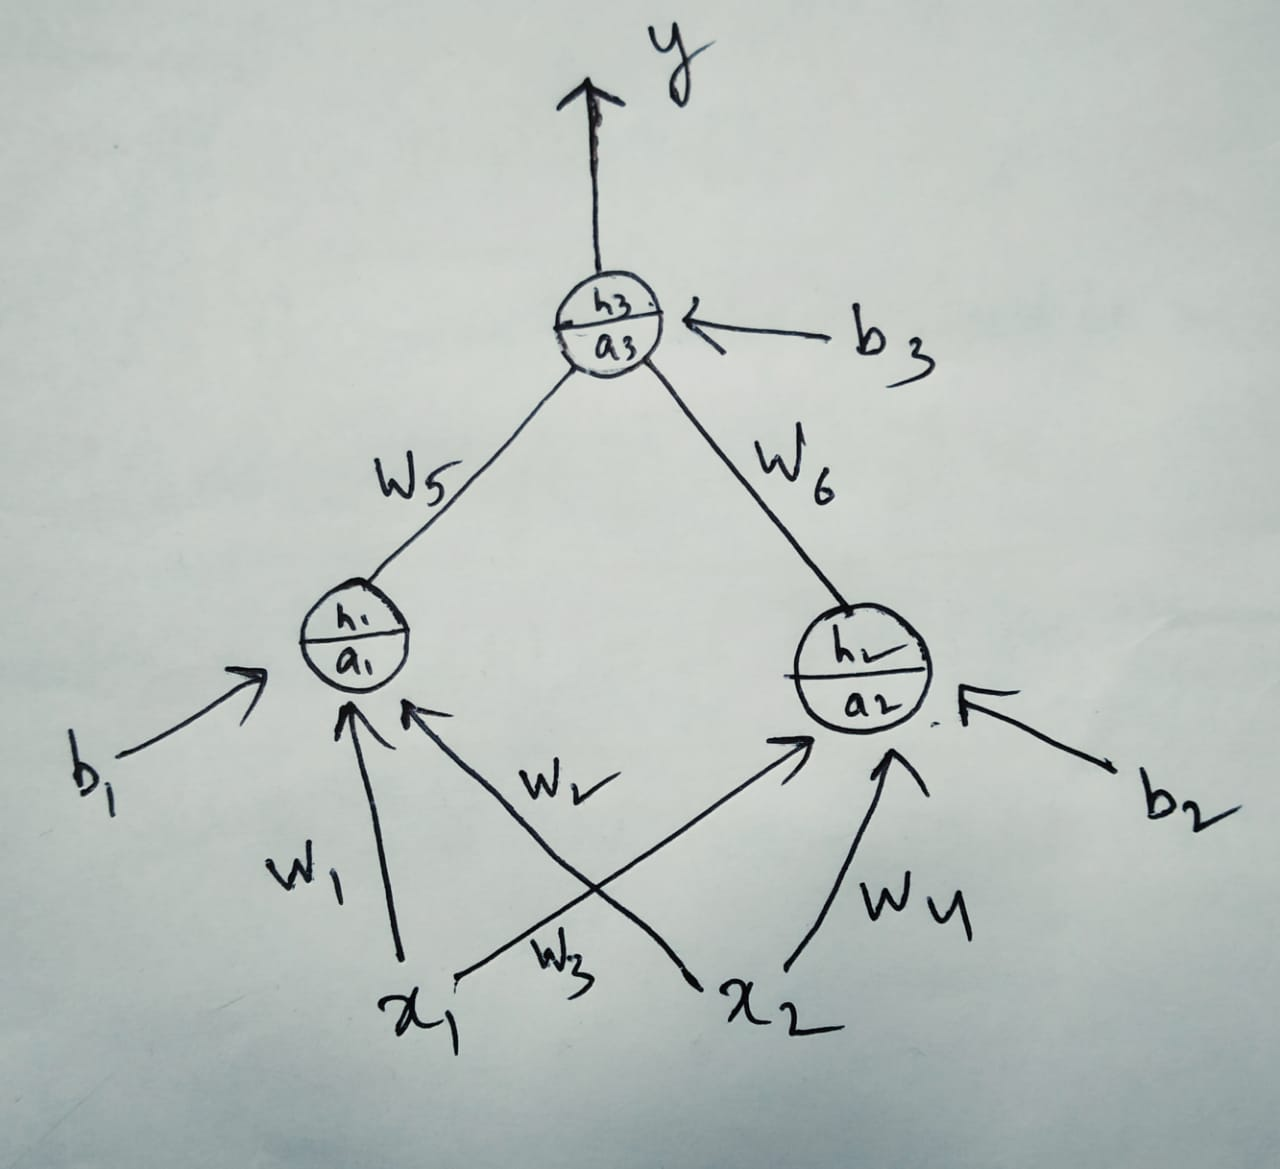

In [58]:
class FirstFFNetwork:
  
  def __init__(self):
    self.w1 = np.random.rand()
    self.w2 = np.random.rand()
    self.w3 = np.random.rand()
    self.w4 = np.random.rand()
    self.w5 = np.random.rand()
    self.w6 = np.random.rand()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0

  def sigmoid(self, x):
    return 1.0/(1.0 - np.exp(-x))
  
  def forward_pass(self, x):

    self.x1, self.x2 = x
    # layer 1
    self.a1 = self.w1*self.x1 + self.w2*self.x2 +self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 +self.b2
    self.h2 = self.sigmoid(self.a2)
    #layer 2
    self.a3 = self.w5*self.h1 + self.w6*self.h2 +self.b3
    self.h3 = self.sigmoid(self.a3)

    return self.h3

  def grad(self, x, y):
    self.forward_pass(x)

    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)

    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * s
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * s
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)

    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * s
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * s
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)

  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise=True, display_loss=False):

    # initialise w,b
    if initialise:
      self.w1 = np.random.rand()
      self.w2 = np.random.rand()
      self.w3 = np.random.rand()
      self.w4 = np.random.rand()
      self.w5 = np.random.rand()
      self.w6 = np.random.rand()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
    
    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epoch'):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3

      m = X.shape[1]
      self.w1 -= learining_rate * dw1 / m
      self.w2 -= learining_rate * dw2 / m
      self.w3 -= learining_rate * dw3 / m
      self.w4 -= learining_rate * dw4 / m
      self.w5 -= learining_rate * dw5 / m
      self.w6 -= learining_rate * dw6 / m
      self.b1 -= learining_rate * db1 / m
      self.b2 -= learining_rate * db2 / m
      self.b3 -= learining_rate * db3 / m

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)

    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)


In [60]:
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs = 2000, learning_rate = 0.01, display_loss = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


NameError: ignored

In [ ]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype('int').ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype('int').ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train - Y_train)+ 0.2))
plt.show()